In [1]:
from galileojp.frames import ExperimentFrameGateway
from galileojp.widgets import experiment_dropdown
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

columns = ['name', 'concurrent_requests', 'mean', 'stdev', 'median', 'q25', 'q75', 'q90', 'q99']
normal_counts = [6, 9, 12, 18, 24, 36]
edge_counts = [2, 3, 6, 9]

def get_normal_names(t, counts):
    names = []
    for c in counts:
        names.append((c, str(c) + '-concurrent-' + t))
    return names

def get_edge_names(t, counts):
    names = []
    for c in counts:
        names.append((c, str(c) + '-concurrent-edge_' + t))
    return names

fgw = ExperimentFrameGateway.from_file('../data/full_test.sqlite')

In [2]:
xp = fgw.experiments()
def id_by_name(name):
    return xp[xp['NAME'] == name]['EXP_ID'].iloc[0]

In [10]:
normal_rr_names = get_normal_names('rr', normal_counts)
normal_lrt_names = get_normal_names('lrt', normal_counts)
edge_rr_names = get_edge_names('rr', edge_counts)
edge_lrt_names = get_edge_names('lrt', edge_counts)


df = pd.DataFrame(columns=columns)

analysis_df = pd.DataFrame(columns=columns)
i = 0
for (concurrent, name) in normal_rr_names:
    traces = fgw.traces(id_by_name(name))
    mean = traces['RTT'].mean()
    median = traces['RTT'].median()
    std = traces['RTT'].std()
    q25 = traces['RTT'].quantile(q=0.25)
    q75 = traces['RTT'].quantile(q=0.75)
    q90 = traces['RTT'].quantile(q=0.90)
    q99 = traces['RTT'].quantile(q=0.99)
    analysis_df.loc[i] = ['rr', concurrent, mean, std, median, q25, q75, q90, q99]
    i += 1
    
for (concurrent, name) in normal_lrt_names:
    traces = fgw.traces(id_by_name(name))
    mean = traces['RTT'].mean()
    median = traces['RTT'].median()
    std = traces['RTT'].std()
    q25 = traces['RTT'].quantile(q=0.25)
    q75 = traces['RTT'].quantile(q=0.75)
    q90 = traces['RTT'].quantile(q=0.90)
    q99 = traces['RTT'].quantile(q=0.99)
    analysis_df.loc[i] = ['lrt', concurrent, mean, std, median, q25, q75, q90, q99]
    i += 1

for (concurrent, name) in edge_rr_names:
    traces = fgw.traces(id_by_name(name))
    mean = traces['RTT'].mean()
    median = traces['RTT'].median()
    std = traces['RTT'].std()
    q25 = traces['RTT'].quantile(q=0.25)
    q75 = traces['RTT'].quantile(q=0.75)
    q90 = traces['RTT'].quantile(q=0.90)
    q99 = traces['RTT'].quantile(q=0.99)
    analysis_df.loc[i] = ['edge-rr', concurrent, mean, std, median, q25, q75, q90, q99]
    i += 1

for (concurrent, name) in edge_lrt_names:
    traces = fgw.traces(id_by_name(name))
    mean = traces['RTT'].mean()
    median = traces['RTT'].median()
    std = traces['RTT'].std()
    q25 = traces['RTT'].quantile(q=0.25)
    q75 = traces['RTT'].quantile(q=0.75)
    q90 = traces['RTT'].quantile(q=0.90)
    q99 = traces['RTT'].quantile(q=0.99)
    analysis_df.loc[i] = ['edge-lrt', concurrent, mean, std, median, q25, q75, q90, q99]
    i += 1
    
for c in ['mean', 'stdev', 'median', 'q25', 'q75', 'q90', 'q99']:
    analysis_df[c] = analysis_df[c].round(0).astype(int).astype(str) + 'ms'
    
analysis_df


,name,concurrent_requests,mean,stdev,median,q25,q75,q90,q99
0,rr,6,165ms,83ms,142ms,95ms,199ms,288ms,425ms
1,rr,9,187ms,110ms,158ms,98ms,214ms,339ms,564ms
2,rr,12,238ms,223ms,154ms,97ms,280ms,517ms,1128ms
3,rr,18,368ms,490ms,157ms,97ms,323ms,1123ms,2274ms
4,rr,24,486ms,745ms,157ms,96ms,331ms,1407ms,3424ms
5,rr,36,734ms,1263ms,160ms,96ms,393ms,2229ms,5780ms
6,lrt,6,151ms,72ms,136ms,90ms,189ms,239ms,405ms
7,lrt,9,157ms,84ms,138ms,91ms,191ms,250ms,476ms
8,lrt,12,185ms,160ms,140ms,92ms,199ms,318ms,913ms
9,lrt,18,232ms,263ms,149ms,93ms,228ms,487ms,1488ms


In [9]:
# This shows the relative difference between RR and LRT in percent

def percent_delta(base, other):
    return ((base-other)/base * 100).round(2).astype(str) + '%'

def diff_df(base, other):
    n = base.copy()
    n['mean'] = percent_delta(base['mean'], other['mean'])
    n['stdev'] = percent_delta(base['stdev'], other['stdev'])
    n['median'] = percent_delta(base['stdev'], other['stdev'])
    n['q25'] = percent_delta(base['q25'], other['q25'])
    n['q75'] = percent_delta(base['q75'], other['q75'])
    n['q90'] = percent_delta(base['q90'], other['q90'])
    n['q99'] = percent_delta(base['q99'], other['q99'])
    return n.drop(columns='index').round(1)

df = analysis_df
rr = df[df['name'] == 'rr'].reset_index()
lrt = df[df['name'] == 'lrt'].reset_index()
edge_rr = df[df['name'] == 'edge-rr'].reset_index()
edge_lrt = df[df['name'] == 'edge-lrt'].reset_index()
delta = diff_df(rr, lrt)
edge_delta = diff_df(edge_rr, edge_lrt)
edge_delta

,name,concurrent_requests,mean,stdev,median,q25,q75,q90,q99
0,edge-rr,2,17.28%,2.59%,2.59%,22.87%,26.23%,1.5%,1.07%
1,edge-rr,3,8.82%,-10.3%,-10.3%,26.54%,9.14%,0.59%,-7.37%
2,edge-rr,6,-2.7%,-9.62%,-9.62%,-1.63%,-1.53%,-5.89%,-4.74%
3,edge-rr,9,2.77%,5.9%,5.9%,-0.84%,2.58%,5.31%,0.42%


In [11]:
lrt_df = fgw.traces(id_by_name('24-concurrent-lrt'))
rr_df = fgw.traces(id_by_name('24-concurrent-rr'))

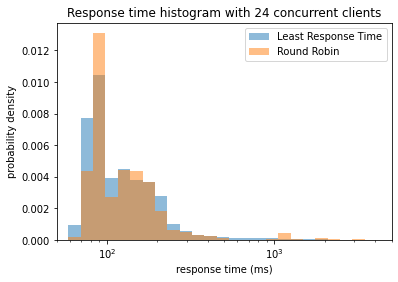

In [12]:
bins = 100

bins = np.logspace(0, 12, base=2)
# bins = 100
plt.title('Response time histogram with 24 concurrent clients')
plt.xscale('log')
plt.xlim(50, 5000)
plt.xlabel('response time (ms)')
plt.ylabel('probability density')
plt.hist(lrt_df['RTT'], bins, alpha=0.5, label='Least Response Time', density=True)
plt.hist(rr_df['RTT'], bins, alpha=0.5, label='Round Robin', density=True)
plt.legend(loc='upper right')
plt.show()